<a href="https://colab.research.google.com/github/ABHIjithGT/Academic-Programs-Semester-based/blob/main/Lab_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pandas.plotting import scatter_matrix, andrews_curves, parallel_coordinates
import plotly.express as px

sns.set(style="whitegrid")

from google.colab import files
uploaded = files.upload()
df = pd.read_csv('Breast_Cancer.csv')

Saving Breast_Cancer.csv to Breast_Cancer.csv


In [ ]:
print("\nHEAD\n", df.head())
print("\nTAIL\n", df.tail())
print("\nCOUNT\n", df.count())
print("\nINFO\n")
df.info()
print("\nSHAPE\n", df.shape)
print("\nDESCRIBE\n", df.describe())


HEAD
          id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smo

In [ ]:
df.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


# **1. What is the distribution of malignant vs benign cases?**

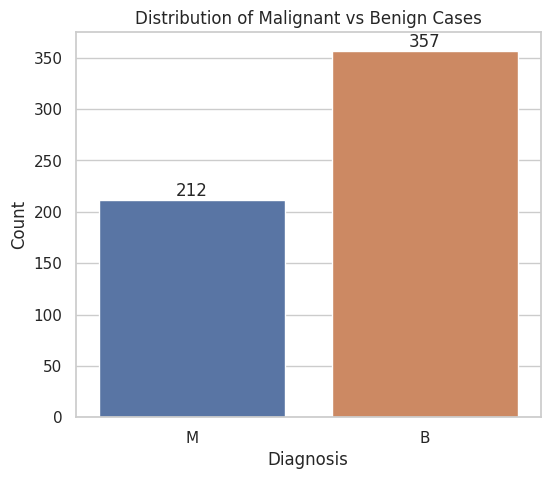

diagnosis
B    62.74
M    37.26
Name: proportion, dtype: float64


In [ ]:
plt.figure(figsize=(6,5))
sns.countplot(x='diagnosis', hue='diagnosis', data=df)
plt.title('Distribution of Malignant vs Benign Cases')
plt.xlabel('Diagnosis')
plt.ylabel('Count')

# Add counts on top
for p in plt.gca().patches:
    plt.gca().annotate(f"{int(p.get_height())}",
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='bottom')

plt.show()

# Percentage breakdown
print(df['diagnosis'].value_counts(normalize=True).mul(100).round(2))


# **2. Which features differ the most between malignant and benign tumors?**

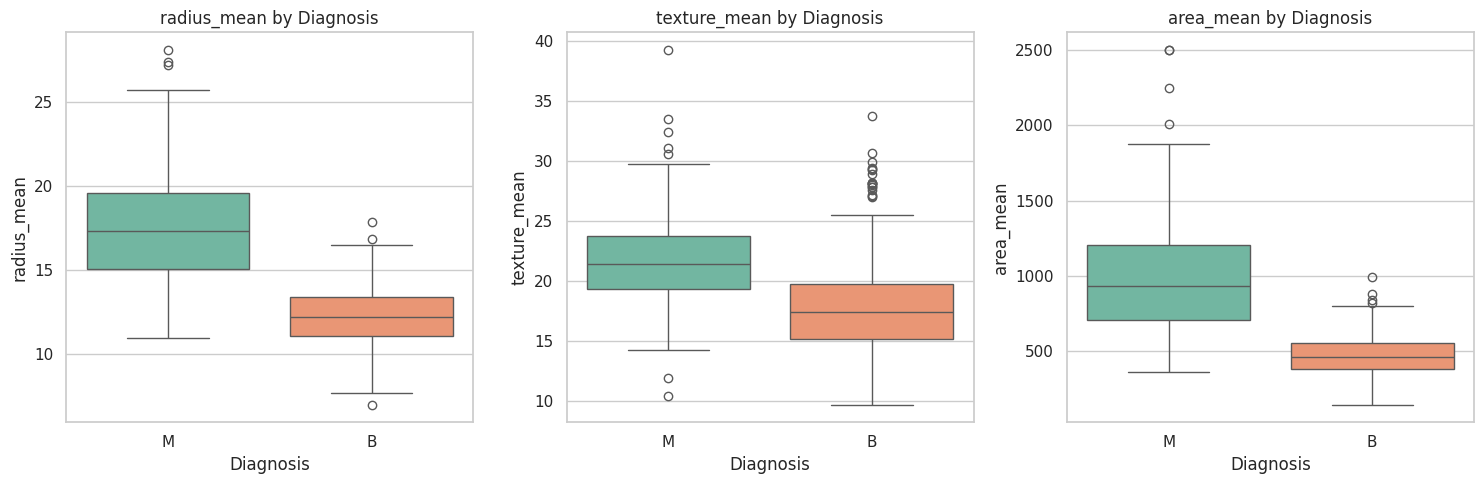

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select key features
features = ['radius_mean', 'texture_mean', 'area_mean']

plt.figure(figsize=(15,5))

for i, feat in enumerate(features, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(
        x='diagnosis', y=feat, hue='diagnosis',
        data=df, palette='Set2', legend=False
    )
    plt.title(f'{feat} by Diagnosis')
    plt.xlabel('Diagnosis')
    plt.ylabel(feat)

plt.tight_layout()
plt.show()


# **3. Is there a strong correlation between radius, perimeter, and area?**

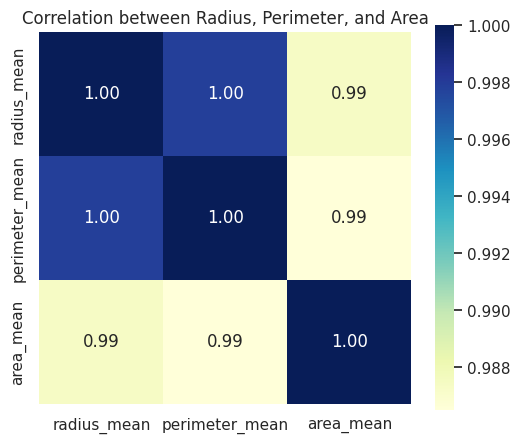

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select features of interest
corr_features = ['radius_mean', 'perimeter_mean', 'area_mean']

# Compute correlation matrix
corr_matrix = df[corr_features].corr()

# Plot heatmap
plt.figure(figsize=(6,5))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="YlGnBu", square=True)
plt.title('Correlation between Radius, Perimeter, and Area')
plt.show()


# **4. Which features are most useful in distinguishing malignant from benign?**

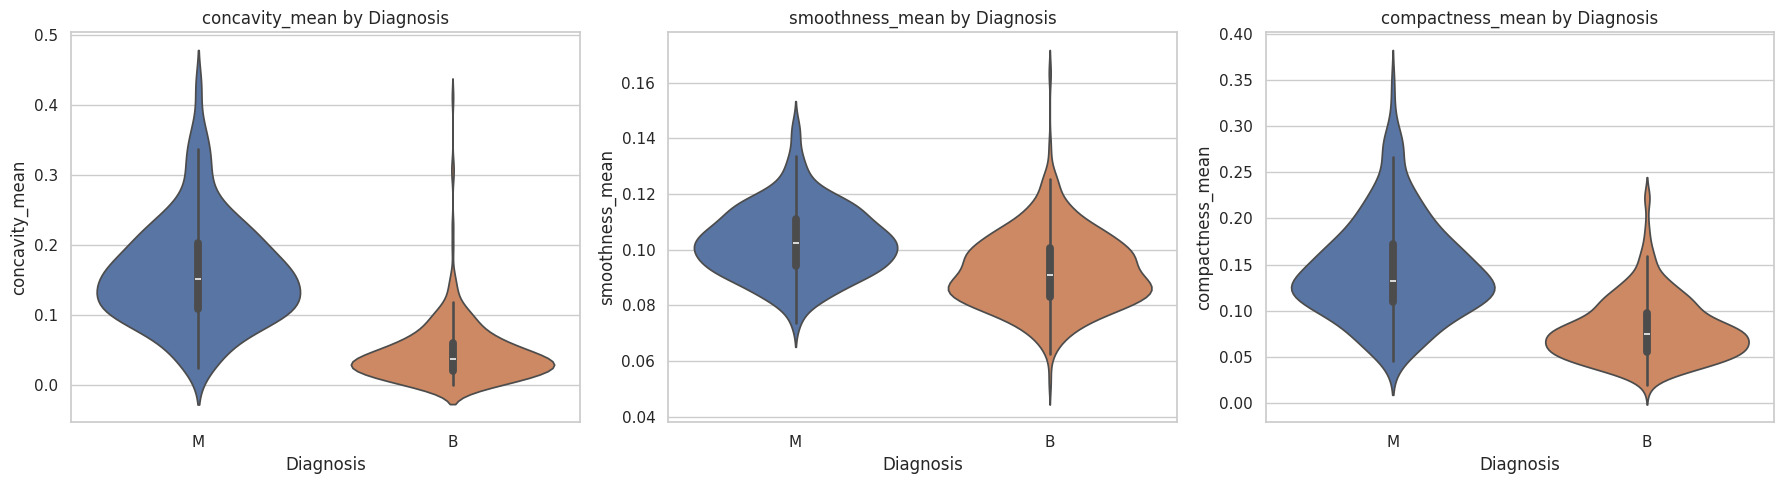

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select features that often help distinguish tumor types
features = ['concavity_mean', 'smoothness_mean', 'compactness_mean']

plt.figure(figsize=(18,5))

for i, feat in enumerate(features, 1):
    plt.subplot(1, 3, i)
    sns.violinplot(
        x='diagnosis', y=feat, hue='diagnosis',
        data=df, legend=False
    )
    plt.title(f'{feat} by Diagnosis')
    plt.xlabel('Diagnosis')
    plt.ylabel(feat)

plt.tight_layout()
plt.show()


# **5. How do "worst" features compare to "mean" features in classification power?**

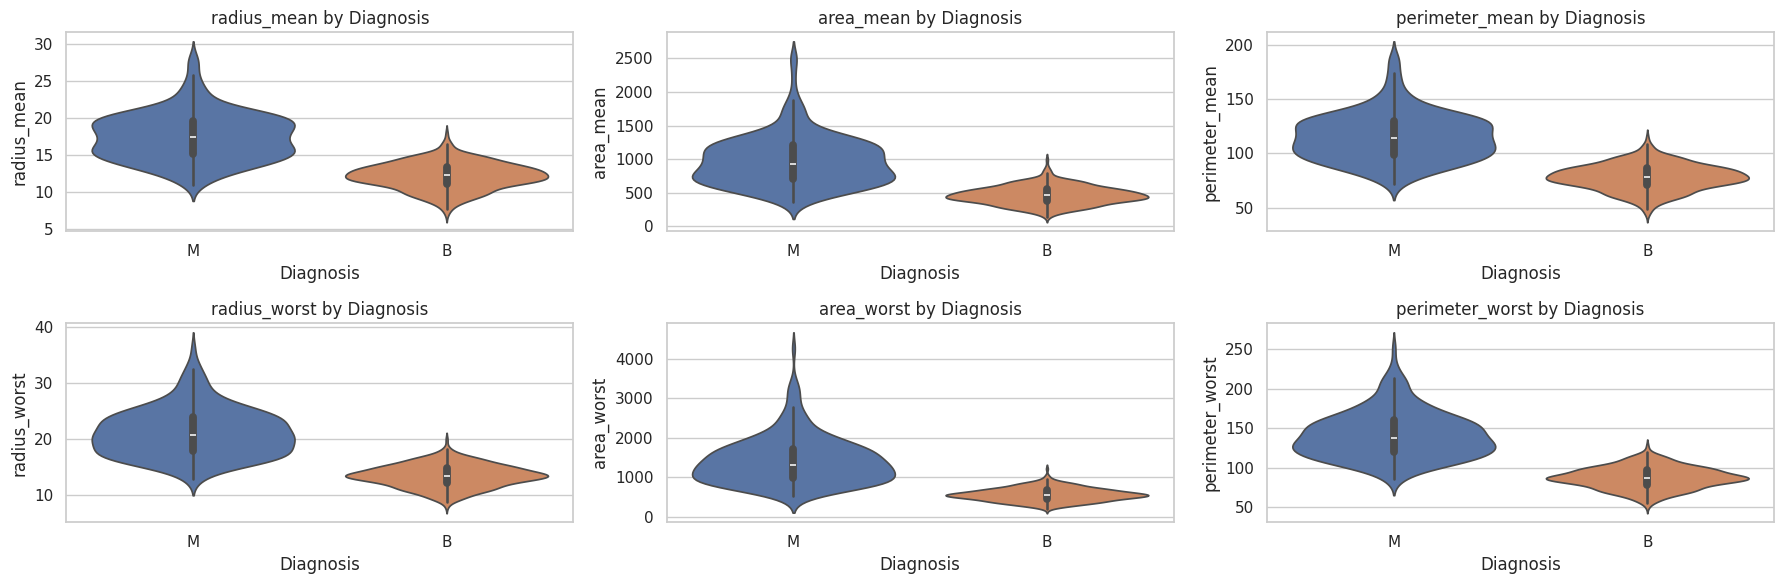

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pick pairs of mean vs worst features
feature_pairs = [
    ('radius_mean', 'radius_worst'),
    ('area_mean', 'area_worst'),
    ('perimeter_mean', 'perimeter_worst')
]

plt.figure(figsize=(18,6))

for i, (mean_feat, worst_feat) in enumerate(feature_pairs, 1):
    plt.subplot(2, 3, i)
    sns.violinplot(
        x='diagnosis', y=mean_feat, hue='diagnosis',
        data=df, legend=False
    )
    plt.title(f'{mean_feat} by Diagnosis')
    plt.xlabel('Diagnosis')
    plt.ylabel(mean_feat)

    plt.subplot(2, 3, i+3)
    sns.violinplot(
        x='diagnosis', y=worst_feat, hue='diagnosis',
        data=df,  legend=False
    )
    plt.title(f'{worst_feat} by Diagnosis')
    plt.xlabel('Diagnosis')
    plt.ylabel(worst_feat)

plt.tight_layout()
plt.show()


# **6. Are there multicollinearity issues among features?**

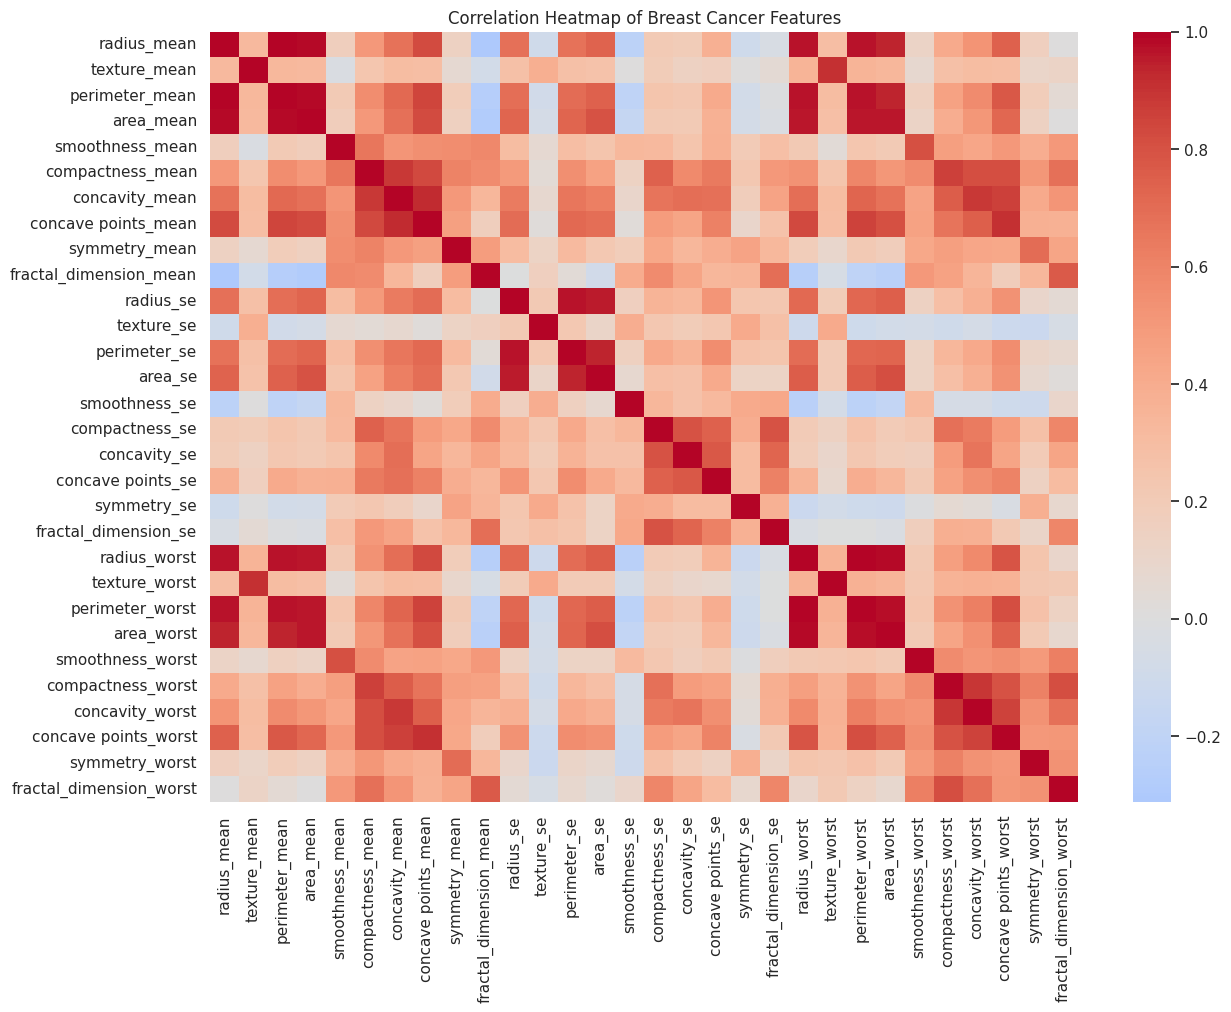

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix
corr = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(14,10))
sns.heatmap(
    corr, cmap="coolwarm", center=0,
    annot=False, square=False, cbar=True
)
plt.title("Correlation Heatmap of Breast Cancer Features")
plt.show()


# **7. Which top 5 features show the largest separation between malignant and benign tumors?**

Top 5 features: ['area_worst', 'concave points_worst', 'concave points_mean', 'radius_worst', 'perimeter_worst']


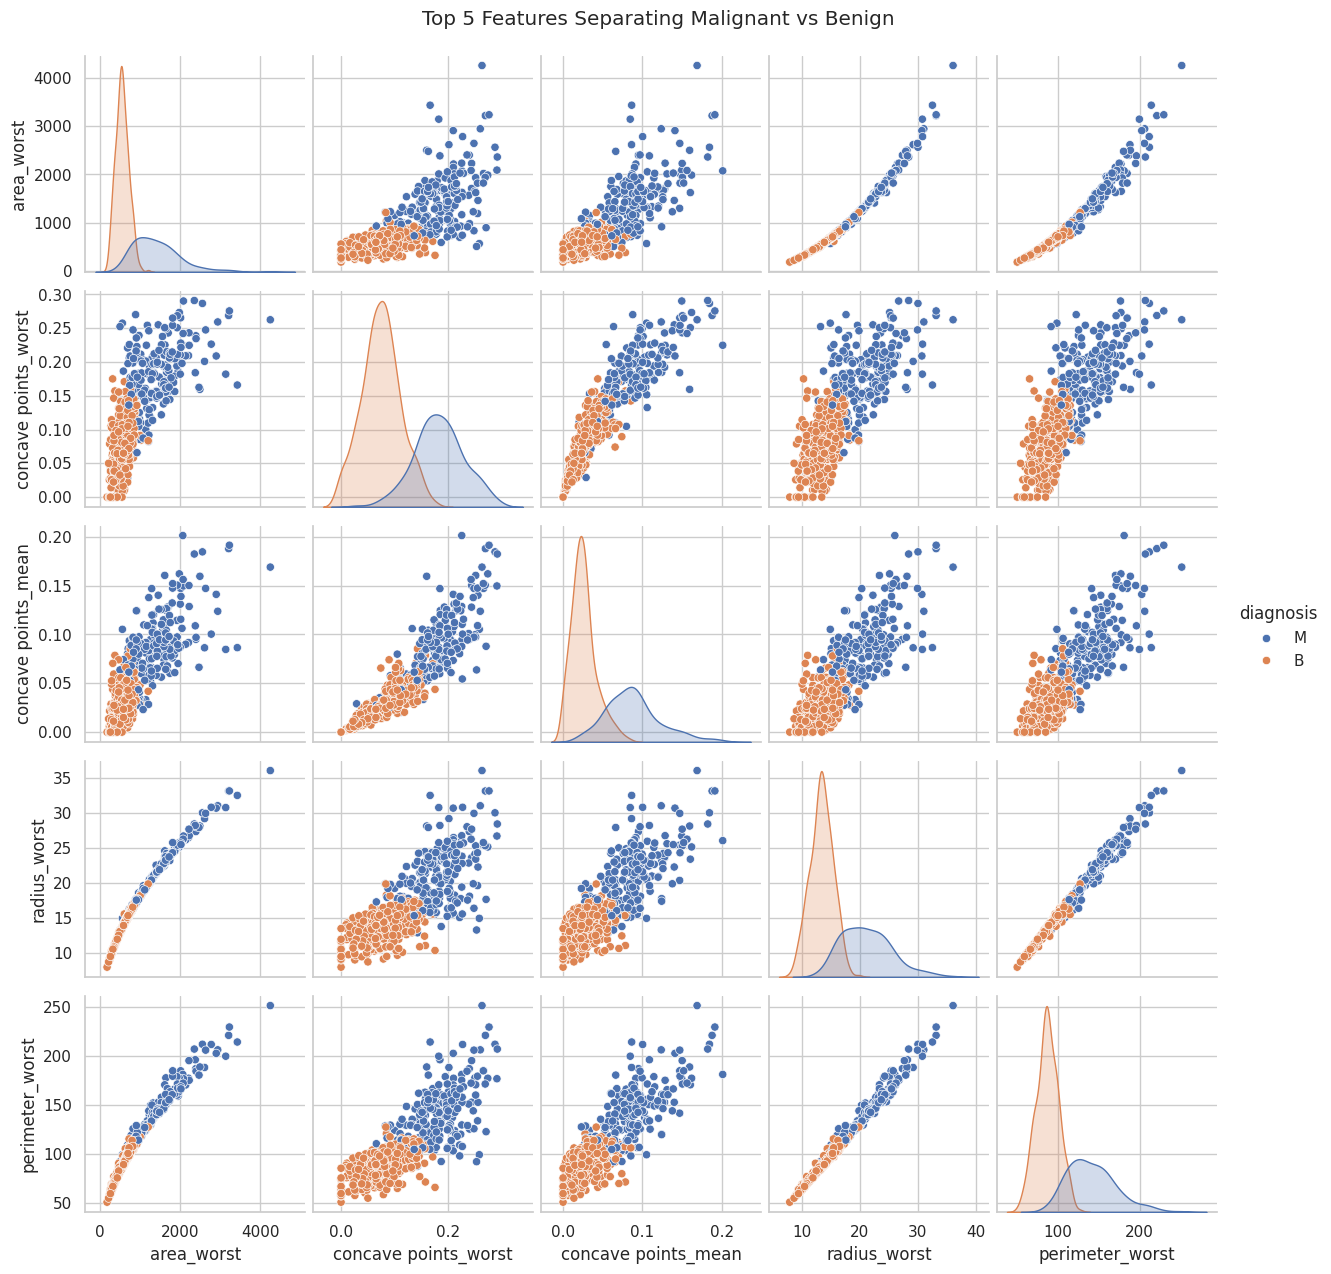

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Encode diagnosis (M=1, B=0)
df_encoded = df.copy()
df_encoded['diagnosis'] = LabelEncoder().fit_transform(df_encoded['diagnosis'])

# Separate features and target
X = df_encoded.drop(columns=['diagnosis'])
y = df_encoded['diagnosis']

# Train a simple RandomForest to get feature importance
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

# Get feature importance
importances = pd.Series(rf.feature_importances_, index=X.columns)
top5_features = importances.sort_values(ascending=False).head(5).index.tolist()
print("Top 5 features:", top5_features)

# Pairplot for top 5 features
sns.pairplot(df, vars=top5_features, hue="diagnosis",diag_kind="kde")
plt.suptitle("Top 5 Features Separating Malignant vs Benign", y=1.02)
plt.show()


# **8. What is the average tumor size (radius/area) for malignant vs benign?**

Average tumor size (radius_mean, area_mean) by diagnosis:

           radius_mean  area_mean
diagnosis                        
B                12.15     462.79
M                17.46     978.38


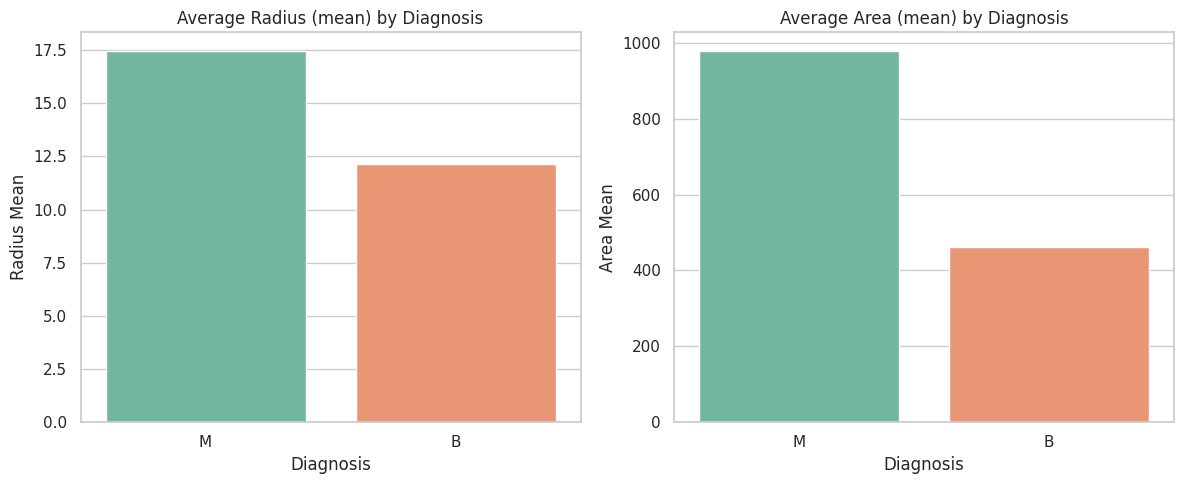

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Descriptive statistics
print("Average tumor size (radius_mean, area_mean) by diagnosis:\n")
print(df.groupby('diagnosis')[['radius_mean', 'area_mean']].mean().round(2))

# Grouped bar plots
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.barplot(x='diagnosis', y='radius_mean', data=df, hue='diagnosis', dodge=False, errorbar=None, palette="Set2")
plt.title('Average Radius (mean) by Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Radius Mean')
plt.legend([],[], frameon=False)

plt.subplot(1,2,2)
sns.barplot(x='diagnosis', y='area_mean', data=df, hue='diagnosis', dodge=False, errorbar=None, palette="Set2")
plt.title('Average Area (mean) by Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Area Mean')
plt.legend([],[], frameon=False)

plt.tight_layout()
plt.show()


# **9. Are there any outliers in the dataset? How might they affect classification?**

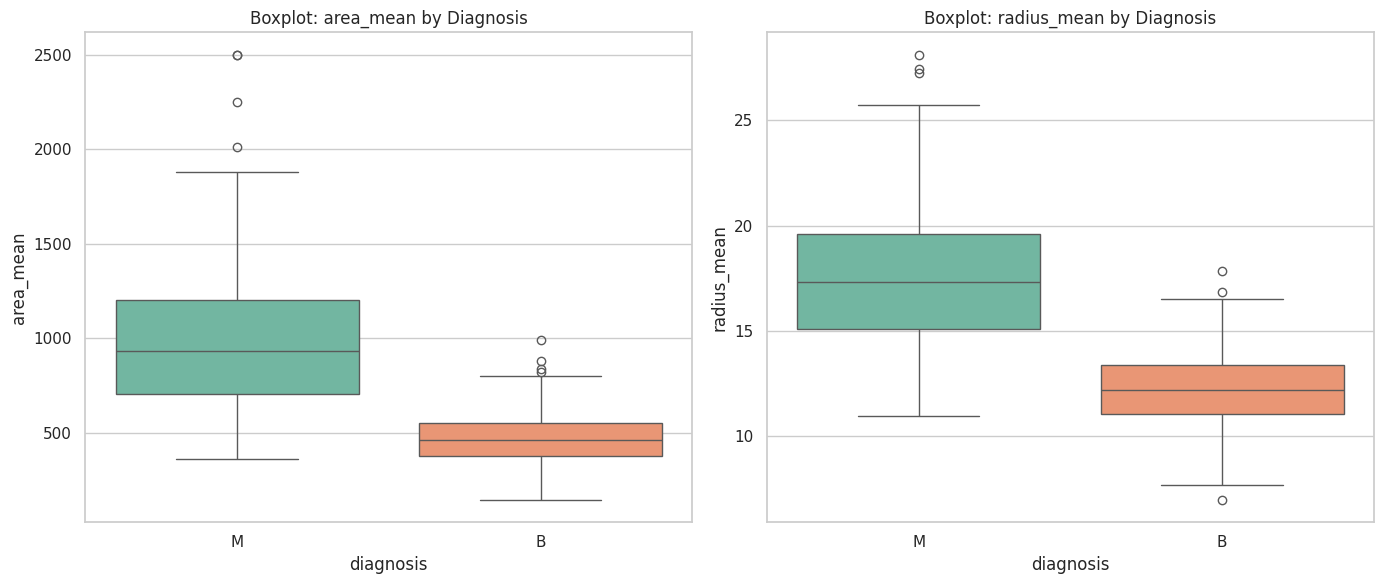

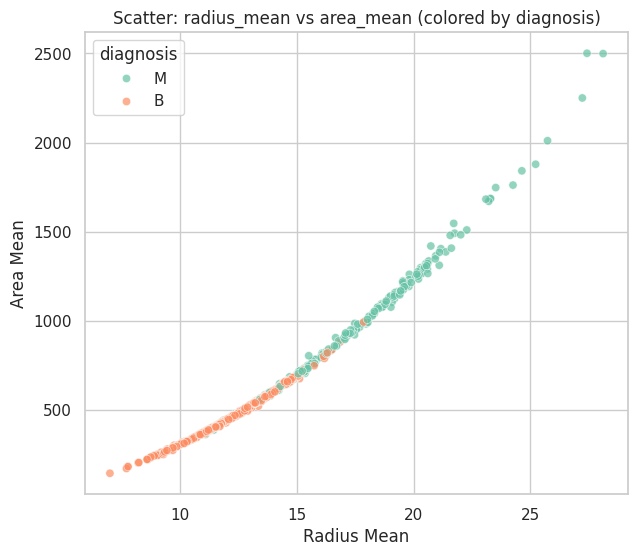

Top 5 largest tumors by area_mean:
    diagnosis  radius_mean  area_mean  perimeter_mean
461         M        27.42     2501.0           186.9
212         M        28.11     2499.0           188.5
180         M        27.22     2250.0           182.1
352         M        25.73     2010.0           174.2
82          M        25.22     1878.0           171.5


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Boxplots to detect outliers ---
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
sns.boxplot(x='diagnosis', y='area_mean', data=df, hue='diagnosis', dodge=False, palette="Set2")
plt.title('Boxplot: area_mean by Diagnosis')
plt.legend([],[], frameon=False)

plt.subplot(1,2,2)
sns.boxplot(x='diagnosis', y='radius_mean', data=df, hue='diagnosis', dodge=False, palette="Set2")
plt.title('Boxplot: radius_mean by Diagnosis')
plt.legend([],[], frameon=False)

plt.tight_layout()
plt.show()

# --- Scatterplot to visualize extreme points ---
plt.figure(figsize=(7,6))
sns.scatterplot(x='radius_mean', y='area_mean', hue='diagnosis', data=df, alpha=0.7, palette="Set2")
plt.title('Scatter: radius_mean vs area_mean (colored by diagnosis)')
plt.xlabel('Radius Mean')
plt.ylabel('Area Mean')
plt.show()

# --- Print top 5 largest tumors (potential outliers) ---
print("Top 5 largest tumors by area_mean:")
print(df[['diagnosis','radius_mean','area_mean','perimeter_mean']]
      .sort_values('area_mean', ascending=False)
      .head(5))


# **11. Which features show the highest variance, and do they contribute to classification?**

Top 10 features by overall variance:

area_worst         324167.385
area_mean          123843.554
area_se              2069.432
perimeter_worst      1129.131
perimeter_mean        590.440
texture_worst          37.776
radius_worst           23.360
texture_mean           18.499
radius_mean            12.419
perimeter_se            4.088
dtype: float64


/tmp/ipython-input-1571608521.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=variance.head(15).index, y=variance.head(15).values, palette="viridis")


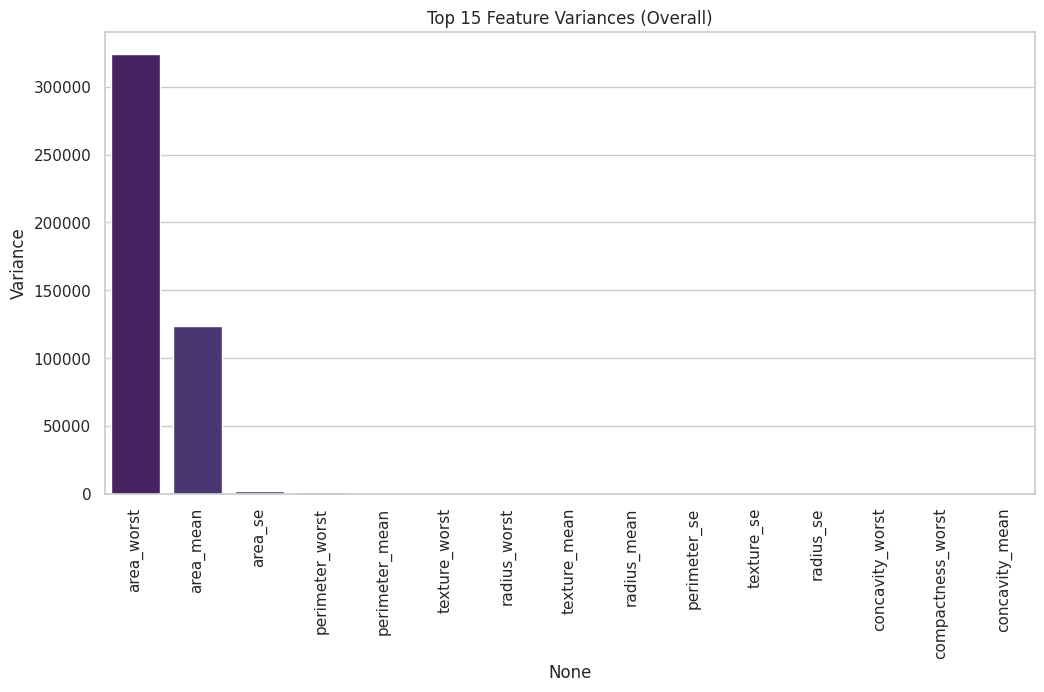


Variance of top 10 features split by class:

diagnosis                B           M
area_worst       26765.426  357565.422
area_mean        18033.030  135378.355
area_se             78.207    3764.469
perimeter_worst    182.982     867.718
perimeter_mean     139.416     477.626
texture_worst       30.184      29.537
radius_worst         3.926      18.349
texture_mean        15.961      14.284
radius_mean          3.170      10.265
perimeter_se         0.595       6.597


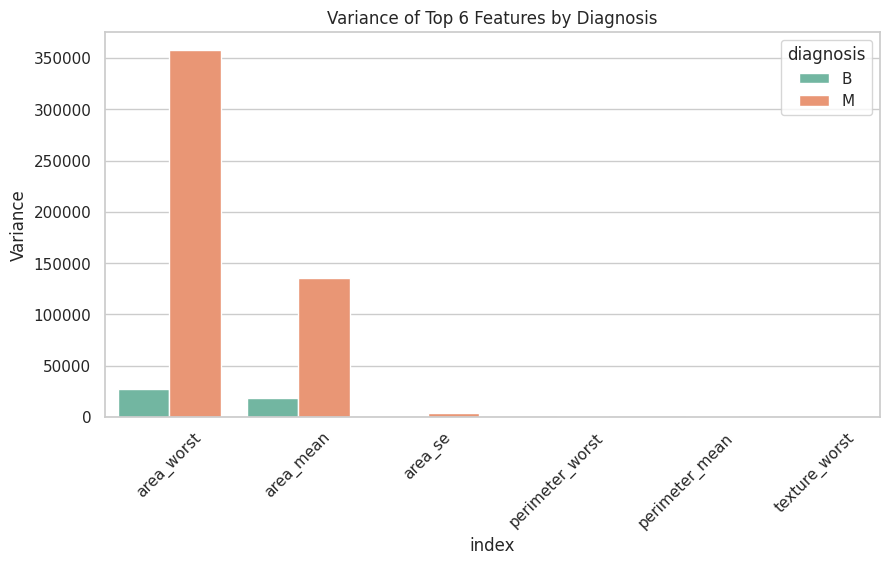

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Select numeric features only
numeric_df = df.select_dtypes(include=[np.number])

# --- Overall variance ---
variance = numeric_df.var().sort_values(ascending=False)
print("Top 10 features by overall variance:\n")
print(variance.head(10).round(3))

# --- Plot top 15 variances ---
plt.figure(figsize=(12,6))
sns.barplot(x=variance.head(15).index, y=variance.head(15).values, palette="viridis")
plt.xticks(rotation=90)
plt.title("Top 15 Feature Variances (Overall)")
plt.ylabel("Variance")
plt.show()

# --- Variance by diagnosis (malignant vs benign) ---
variance_by_class = df.groupby('diagnosis')[numeric_df.columns].var().T
print("\nVariance of top 10 features split by class:\n")
print(variance_by_class.loc[variance.head(10).index].round(3))

# --- Compare variance visually for top 6 ---
top6 = variance.head(6).index
var_plot = variance_by_class.loc[top6].reset_index().melt(
    id_vars='index', var_name='diagnosis', value_name='variance'
)

plt.figure(figsize=(10,5))
sns.barplot(x='index', y='variance', hue='diagnosis', data=var_plot, palette="Set2")
plt.xticks(rotation=45)
plt.title("Variance of Top 6 Features by Diagnosis")
plt.ylabel("Variance")
plt.show()


# **12. How does texture differ between malignant and benign tumors?**

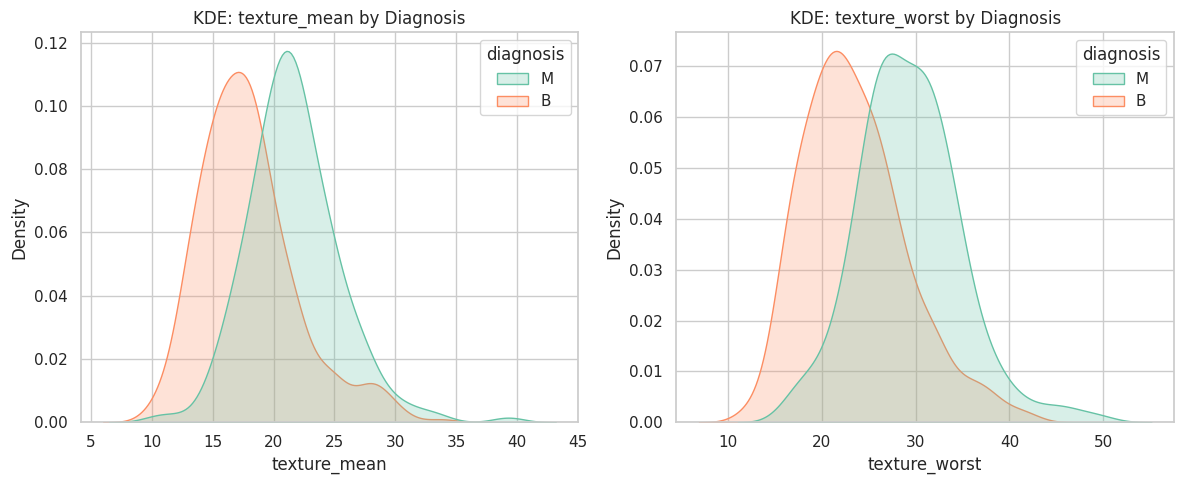

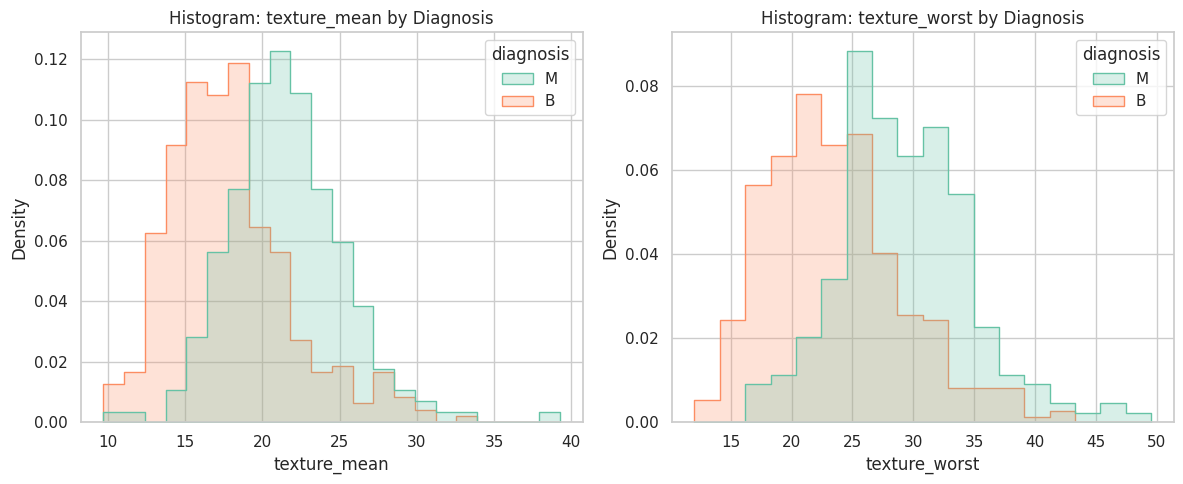

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- KDE plots ---
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.kdeplot(data=df, x='texture_mean', hue='diagnosis', common_norm=False, fill=True, palette="Set2")
plt.title('KDE: texture_mean by Diagnosis')

plt.subplot(1,2,2)
sns.kdeplot(data=df, x='texture_worst', hue='diagnosis', common_norm=False, fill=True, palette="Set2")
plt.title('KDE: texture_worst by Diagnosis')

plt.tight_layout()
plt.show()

# --- Histograms ---
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.histplot(data=df, x='texture_mean', hue='diagnosis', element='step', stat='density', common_norm=False, palette="Set2")
plt.title('Histogram: texture_mean by Diagnosis')

plt.subplot(1,2,2)
sns.histplot(data=df, x='texture_worst', hue='diagnosis', element='step', stat='density', common_norm=False, palette="Set2")
plt.title('Histogram: texture_worst by Diagnosis')

plt.tight_layout()
plt.show()


# **13. Do tumors with higher concavity tend to be malignant?**

/tmp/ipython-input-701485494.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='diagnosis', y='concavity_mean', data=df, palette="Set2")


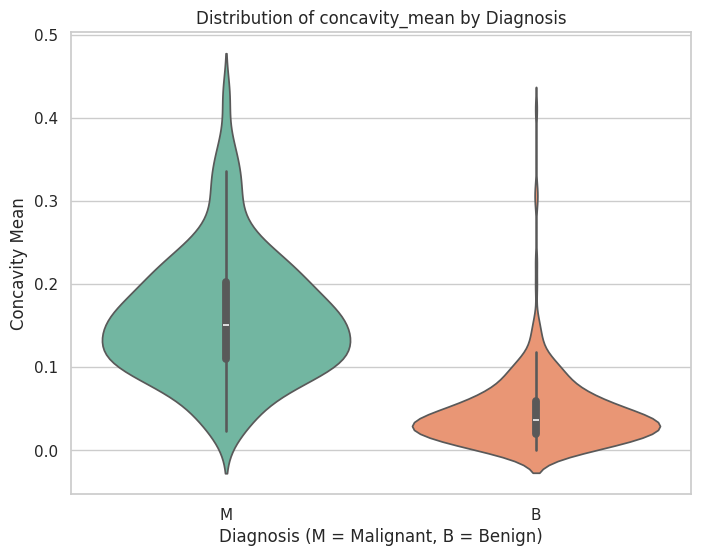

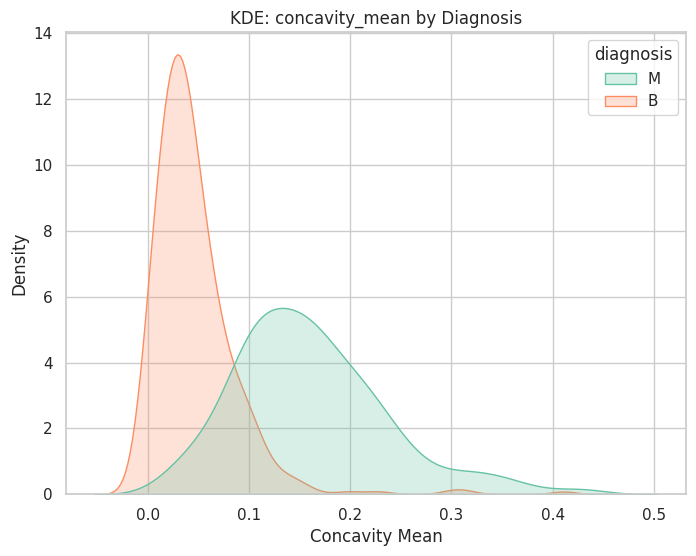

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.violinplot(x='diagnosis', y='concavity_mean', data=df, palette="Set2")
plt.title('Distribution of concavity_mean by Diagnosis')
plt.xlabel('Diagnosis (M = Malignant, B = Benign)')
plt.ylabel('Concavity Mean')
plt.show()

# KDE comparison
plt.figure(figsize=(8,6))
sns.kdeplot(data=df, x='concavity_mean', hue='diagnosis', common_norm=False, fill=True, palette="Set2")
plt.title('KDE: concavity_mean by Diagnosis')
plt.xlabel('Concavity Mean')
plt.show()


# **14. What is the relationship between smoothness and compactness?**

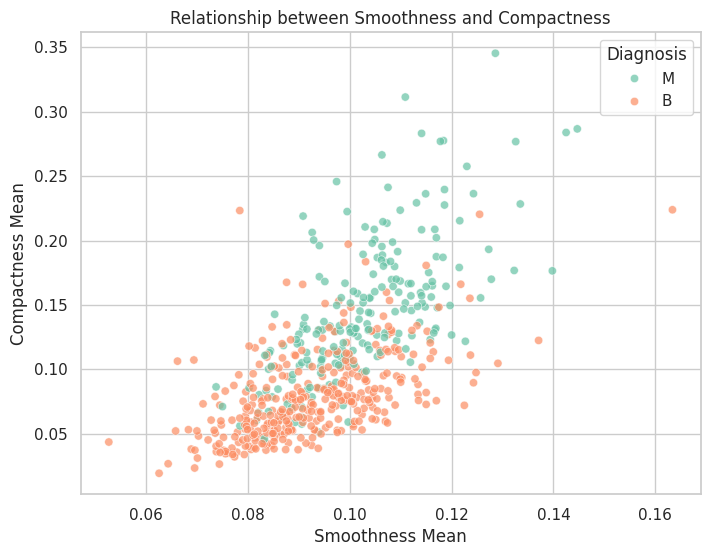

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(data=df,
                x='smoothness_mean',
                y='compactness_mean',
                hue='diagnosis',
                palette="Set2",
                alpha=0.7)
plt.title('Relationship between Smoothness and Compactness')
plt.xlabel('Smoothness Mean')
plt.ylabel('Compactness Mean')
plt.legend(title='Diagnosis')
plt.show()


# **15. Which class tends to have higher values of fractal dimension?**

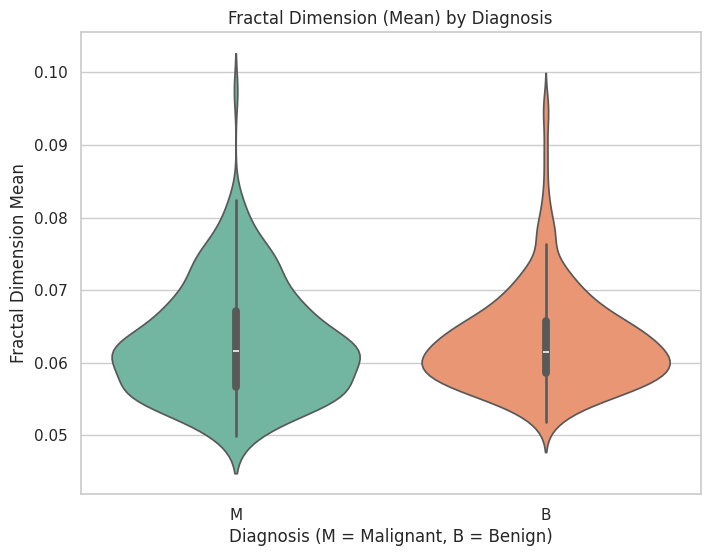

In [ ]:
plt.figure(figsize=(8,6))
sns.violinplot(
    x='diagnosis',
    y='fractal_dimension_mean',
    hue='diagnosis',  # added
    data=df,
    palette="Set2",
    legend=False      # hides duplicate legend
)
plt.title('Fractal Dimension (Mean) by Diagnosis')
plt.xlabel('Diagnosis (M = Malignant, B = Benign)')
plt.ylabel('Fractal Dimension Mean')
plt.show()
